 <div style="border:1px solid #000; border-radius:1px; background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:3px; border-radius:1px; background:#178383; text-align:center;">
        <span style="font-family:sans-serif; font-size:40px; color:#fff;">Comparing Ice cream brands</span>
    </div>
</div>

# Loading Libraries and dataset

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
from wordcloud import WordCloud

In [2]:
#  read csv file

df = pd.read_csv('/kaggle/input/ice-cream-dataset/combined/products.csv')


We selected a dataset featuring ice cream brands, flavors including flavor names, average ratings,ingredients and the number of ratings. This choice ensures a focused analysis on a specific market player. The brand and flavor name column allows us to understand customer preferences, while the rating column provides a quantitative measure of satisfaction. The rating count column adds statistical significance, distinguishing flavors with high ratings based on a substantial number of reviews. This dataset will be instrumental in uncovering insights to refine the ice cream shop's menu for optimal customer satisfaction

In [3]:
# read head

df.head()


,brand,key,name,subhead,description,rating,rating_count,ingredients
0,bj,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,bj,1_bj,Netflix & Chilll'd™,Peanut Butter Ice Cream with Sweet & Salty Pre...,There’s something for everyone to watch on Net...,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,bj,2_bj,Chip Happens,A Cold Mess of Chocolate Ice Cream with Fudge ...,Sometimes “chip” happens and everything’s a me...,4.7,130,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
3,bj,3_bj,Cannoli,Mascarpone Ice Cream with Fudge-Covered Pastry...,As a Limited Batch that captured the rapture o...,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,bj,4_bj,Gimme S’more!™,Toasted Marshmallow Ice Cream with Chocolate C...,It’s a gimme: there’s always room for s’more. ...,4.5,281,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."


We can see that we have a data set about  Brand, Name, decription, rating, rating counts, ingredients of Ice creams. We only keep required variables for our analysis.

## Data Preparation

In [4]:
# drop key, subhead, deescription

df.drop(['key', 'subhead', 'description'], axis=1, inplace=True)


In [5]:
df.head()

,brand,name,rating,rating_count,ingredients
0,bj,Salted Caramel Core,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,bj,Netflix & Chilll'd™,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,bj,Chip Happens,4.7,130,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
3,bj,Cannoli,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,bj,Gimme S’more!™,4.5,281,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."


Now we  have 5 columns.
* Brand
* Name
* Rating
* Rating Counts
* Ingredients

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         241 non-null    object 
 1   name          241 non-null    object 
 2   rating        241 non-null    float64
 3   rating_count  241 non-null    int64  
 4   ingredients   241 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 9.5+ KB


We have 5 variables and 241 observation.

In [7]:
#missing values

df.isnull().sum()


brand           0
name            0
rating          0
rating_count    0
ingredients     0
dtype: int64

As there is no mising values we do not need to worry about this.

# Exploratoy Data Analysis

In [8]:
# Number of sales by brands

df['brand'].value_counts().to_frame().reset_index()


,brand,count
0,hd,70
1,breyers,69
2,bj,57
3,talenti,45


In [9]:
# Create Plotly pie chart
fig = px.pie(
   df['brand'].value_counts().to_frame().reset_index(),
    values="count",
    names="brand",
    color="brand",
    color_discrete_sequence= ['gold', 'mediumturquoise', 'darkorange', 'lightgreen'],
    hole=0.6,  # Adjust hole size for better readability
    labels={'brand':'Brand',"count":"No. of Observations"}
)
fig.update_traces(textposition='inside', textinfo='percent+label')
# Customize layout
fig.update_layout(
    legend=dict(title="Brand", title_font_size=17),
    font_family="Arial",
    font_size=14,
    title=dict(text="Percentage of Sales by Brand", font_size=22, font_color = "Red"),title_x=0.5
)

fig.show()

We can see that maximum of the ice creame are from hd and breyers flavors.

In [10]:
# scatterplot of rating and counts

fig = px.scatter(df, x='rating', y='rating_count',
                 hover_data=['name', 'brand'], color='brand', symbol = 'brand', size = "rating",
                 labels={'rating':'Ratings',"rating_count":"No. of Ratings"})

# Customize layout
fig.update_layout(
    legend=dict(title="Brand", title_font_size=17),
    font_family="Arial",
    font_size=14,
    title=dict(text="Scatter Plot of Ratings and Rating Counts", font_size=22, font_color = "Darkblue"),title_x=0.5
)
fig.show()


We can see that maximum ratings are more than 4.Now, we will finidng top ice cream flavors based on rating and rating counts.

In [11]:

# Sort and filter data
data_top = (
    df.sort_values(by=["rating", "rating_count"], ascending=False)
    .head(10)
    #.assign(name=lambda x: pd.Categorical(x["name"], x["name"].unique(), ordered=True))
)

data_top.head()

,brand,name,rating,rating_count,ingredients
88,hd,Honey Salted Caramel Almond Ice Cream,5.0,103,"CREAM, SKIM MILK, SUGAR, SWEETENED CONDENSED M..."
120,hd,Vanilla Caramel White Chocolate TRIO CRISPY LA...,5.0,32,"CREAM, SKIM MILK, SUGAR, SWEETENED CONDENSED M..."
29,bj,Ice Cream Sammie,5.0,31,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
100,hd,Peppermint Bark Ice Cream,5.0,31,"WHITE CHOCOLATE ICE CREAM (CREAM, SKIM MILK, S..."
71,hd,Chocolate Fudge Non-Dairy Bar,5.0,22,"WATER, SUGAR, CORN SYRUP, CHOCOLATE, COCONUT O..."


In [12]:
fig = px.bar(data_top, x='name', y='rating',
             hover_data=['brand', 'rating_count'], color='brand',text_auto=True,
             labels={'rating':'Ratings',"rating_count":"No. of Ratings"})

# Customize layout
fig.update_layout(
    legend=dict(title="Brand", title_font_size=17),
    font_family="Arial",
    font_size=14,
    title=dict(text="Top flavored Ice creams by ratings", font_size=22, font_color = "Darkblue"),title_x=0.5
)
fig.update_yaxes(range=[0, 6])
#fig.update_traces(text=data_top['rating'], textposition="outside",texttemplate="%{text:.2f}")
fig.show()

We can see that in top ice creams 70% are from hd brand and 20% from bj and 10% from breyers and talenti has no ice cream among top 10.

Now we will find most less favorite ice creams.

In [13]:
# Sort and filter data
data_bot = (
    df.sort_values(by=["rating", "rating_count"], ascending=True)
    .head(10)
    #.assign(name=lambda x: pd.Categorical(x["name"], x["name"].unique(), ordered=True))
)

data_bot.head()

,brand,name,rating,rating_count,ingredients
221,breyers,Chocolate Chip Cookie Dough,1.2,89,"MILK, SUGAR, CORN SYRUP, CREAM, ENRICHED WHEAT..."
50,bj,Chocolate Chip Cookie Dough Core,1.8,166,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."
223,breyers,Coffee,2.4,52,"MILK, CORN SYRUP, SUGAR, CREAM, COFFEE EXTRACT..."
238,breyers,Layered Dessert S'mores,2.5,31,"MILK, CORN SYRUP, SUGAR, WHEAT FLOUR, BUTTER, ..."
123,hd,Vanilla Milk Chocolate Almond Ice Cream Bar,2.5,224,"CREAM, SKIM MILK, SUGAR, EGG YOLKS, MILK CHOCO..."


In [14]:
fig = px.bar(data_bot, x='name', y='rating',
             hover_data=['brand', 'rating_count'], color='brand',
             labels={'rating':'Ratings',"rating_count":"No. of Ratings"},text_auto=True)

# Customize layout
fig.update_layout(
    legend=dict(title="Brand", title_font_size=17),
    font_family="Arial",
    font_size=14,
    title=dict(text="Less favouirte flavored Ice creams by ratings", font_size=22, font_color = "Darkblue"),title_x=0.5
)
fig.update_yaxes(range=[0, 6])
fig.show()

In [15]:
df.describe()

,rating,rating_count
count,241.000000,241.000000
mean,4.223237,90.016598
std,0.620383,111.349449
min,1.200000,2.000000
25%,4.000000,28.000000
50%,4.400000,59.000000
75%,4.700000,112.000000
max,5.000000,983.000000


The summary statistics for the "rating" variable reveal a range from 1.2 to 5, with an average of 4.22 and a median of 4.4, indicating a generally positive reception of the ice cream flavors. The low standard deviation of 0.62 suggests a relatively consistent level of satisfaction among customers. On the other hand, the "rating_count" variable exhibits a broader range, spanning from 2 to 983, with an average count of 90.02 and a median of 59.0. The higher standard deviation of 111.35 implies substantial variability in the number of ratings received by different flavors, reflecting diverse levels of customer engagement. Overall, these statistics provide a comprehensive overview of both the satisfaction levels and the extent of customer participation in rating the ice cream flavors.

**Now we will find the common ingredients of ice creams**

In [16]:

# Select the "ingredients" column and remove spaces
ingredients = df["ingredients"].str.replace(r"\s+", "")
# Replace specific patterns
ingredients = ingredients.str.replace(r"(SUGAR,WATER)", "SUGARWATER")
ingredients = ingredients.str.replace(r"(CREAM,SALT)", "CREAMSALT")
ingredients = ingredients.str.replace(",", " ")

In [17]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(', '.join(ingredients))

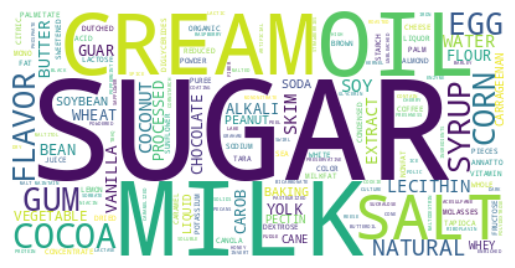

In [18]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see taht Sugar and Cream are mostly common used ingredients.

# Ratings by brands

In [19]:
#boxplot of ratings by brand in plotly

fig = px.box(df, x='brand', y='rating', color='brand', labels={'rating':'Ratings',"brand":"Brands"})
fig.update_layout(
    legend=dict(title="Brand", title_font_size=17),
    font_family="Arial",
    font_size=14,
    title=dict(text="Box Plot of Ratings by Brand", font_size=22, font_color = "Darkblue"),title_x=0.5
)
fig.show()


In [20]:
# calulate mean rating by brand

df_rate = df.groupby('brand')['rating'].mean().round(2).to_frame().reset_index().rename(columns={'rating': 'Mean Rating'})
df_rate

,brand,Mean Rating
0,bj,4.33
1,breyers,3.96
2,hd,4.31
3,talenti,4.36


In [21]:
fig = px.bar(df_rate, x='brand', y='Mean Rating',
             hover_data=['brand', 'Mean Rating'], color='brand',text_auto=True,
             labels={'brand':'Brand',"Mean Rating":"Average Ratings"})

# Customize layout
fig.update_layout(
    legend=dict(title="Brand", title_font_size=17),
    font_family="Arial",
    font_size=14,
    title=dict(text="Average Ratings by Brands", font_size=22, font_color = "Darkblue"),title_x=0.5
)
fig.update_yaxes(range=[0, 6])
#fig.update_traces(text=data_top['rating'], textposition="outside",texttemplate="%{text:.2f}")
fig.show()

Now we will do anova to check the significance of differences among average ratings of brands.

In [22]:

# ANOVA test
model = ols('rating ~ C(brand)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
print("\n Analysis of Productivity:")
print(anova_table)



 Analysis of Productivity:
             sum_sq     df         F    PR(>F)
C(brand)   6.647149    3.0  6.125852  0.000498
Residual  85.722727  237.0       NaN       NaN


We will do now assumption checking before explanation.

## Normality test

In [23]:
# normality test in python

import scipy.stats as stats

# Perform the Shapiro-Wilk test
stat, p = stats.shapiro(model.resid)

# Interpret the results
alpha = 0.05
if p > alpha:
    print('The residuals is normally distributed (fail to reject H0)')
else:
    print('The residuals is not normally distributed (reject H0)')


The residuals is not normally distributed (reject H0)


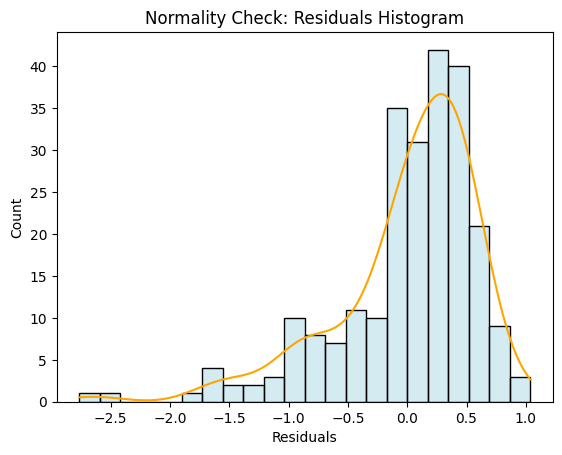

In [24]:
# Histogram of residuals
sns.histplot(model.resid, kde=True, color = 'lightblue')
plt.gca().lines[0].set_color('orange')
plt.title("Normality Check: Residuals Histogram")
plt.xlabel("Residuals")
plt.show()

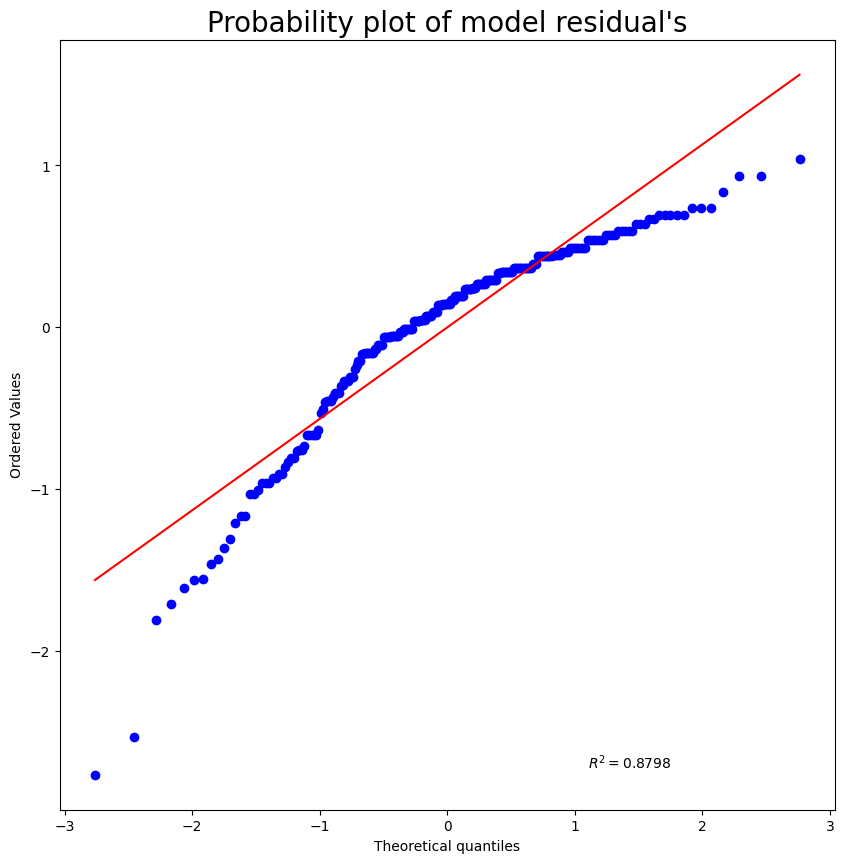

In [25]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

From both test and visuals we can see that our model does not follow normlity assumption.

## Test for homogenity of variance

In [26]:
stat, p_val = stats.levene(df['rating'][df['brand'] == 'bj'],
             df['rating'][df['brand'] == 'breyers'],
             df['rating'][df['brand'] == 'hd'],
             df['rating'][df['brand'] == 'talenti'])

print(stat,p_val)



2.4729764986299787 0.062353809916256095


Our assumption for equal variance fullfilled. As our normality assumption did not match we will use non parametric methods such as kruskal test, alternative of anova test. This test consider medain rather than mean.

# Non parametric test

In [27]:
# calulate mean rating by brand

df_rate = df.groupby('brand')['rating'].median().round(2).to_frame().reset_index().rename(columns={'rating': 'Median Rating'})
df_rate

,brand,Median Rating
0,bj,4.6
1,breyers,4.2
2,hd,4.5
3,talenti,4.4


In [28]:
fig = px.bar(df_rate, x='brand', y='Median Rating',
             hover_data=['brand', 'Median Rating'], color='brand',text_auto=True,
             labels={'brand':'Brand',"Median Rating":"Median Ratings"})

# Customize layout
fig.update_layout(
    legend=dict(title="Brand", title_font_size=17),
    font_family="Arial",
    font_size=14,
    title=dict(text="Median Ratings by Brands", font_size=22, font_color = "Darkblue"),title_x=0.5
)
fig.update_yaxes(range=[0, 6])
#fig.update_traces(text=data_top['rating'], textposition="outside",texttemplate="%{text:.2f}")
fig.show()

In [29]:
stat , p= stats.kruskal(df['rating'][df['brand'] == 'bj'],
             df['rating'][df['brand'] == 'breyers'],
             df['rating'][df['brand'] == 'hd'],
             df['rating'][df['brand'] == 'talenti'])
print(stat)
print(p)

19.679757777340026
0.0001977579835596842


As our p value is less than the significance level of .05 we can say that there are significant diferenes among median of ratings for brands.

## Post hoc test

Now we will use post hoc test to see pair wise differences between brands.

You can learn detail [from here](https://morioh.com/a/a0c9830b9757/scikit-posthocs-multiple-pairwise-comparisons-tests-in-python?fbclid=IwAR3nXUu9c6gXGMpmLs0YxmyV5ZtW95_4Ih6IieSJSJbdbhtNo-03Vf_jYp0) .

In [30]:
pip install scikit-posthocs

  Obtaining dependency information for scikit-posthocs from https://files.pythonhosted.org/packages/43/bd/ca9d53c0e5abd1ef3c3717a4a9070e3ee339116b82c0c6cd28df51a921c6/scikit_posthocs-0.8.1-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [31]:
import scikit_posthocs as sp

In [32]:
sp.posthoc_conover(df, val_col='rating', group_col='brand', p_adjust = 'holm')

,bj,breyers,hd,talenti
bj,1.000000,0.000506,1.000000,1.000000
breyers,0.000506,1.000000,0.001072,0.011481
hd,1.000000,0.001072,1.000000,1.000000
talenti,1.000000,0.011481,1.000000,1.000000


The results of the post hoc median test, with p-values for pairwise comparisons of median ratings between different ice cream brands (BJ, Breyers, HD, Talenti), provide valuable insights into significant differences in customer perceptions. Notably, the analysis indicates statistically significant distinctions in median ratings between **BJ and Breyers, Breyers and HD, and Breyers and Talenti**. However, no significant differences were found between BJ and HD, BJ and Talenti, as well as HD and Talenti. These findings suggest that while Breyers stands out with varying median ratings compared to other brands, customers may perceive less distinction between BJ, HD, and Talenti. This information can guide strategic decision-making, helping the ice cream shop tailor its offerings and marketing strategies to capitalize on brand-specific preferences and enhance overall customer satisfaction.